# Just intonation lattices

Given a list of frequency ratios, draw a graph of their just intonation lattice.

The lattice is represented as a directed graph
- Nodes are frequency ratios
- Two frequencies are connected if they are related by multiplying or dividing by a single prime number (ignoring powers of two)
- The graph is drawn in two dimensions
- Edges are colored to show which prime is used to move between nodes

In [1]:
from fractions import Fraction as F

import pygraphviz as pgv
from sympy.ntheory import factorint
from IPython.display import Image

In [2]:
EDGE_COLORS = {
        3: "red",
        5: "green",
        7: "blue",
        11: "orange",
        13: "purple",
}

In [3]:
frequencies = [
    F(1),
    F(9, 8),
    F(5, 4),
    F(4, 3),
    F(3, 2),
    F(5, 3),
    F(15, 8),
]

In [4]:
frequencies = [
    F(1),
    F(33, 32),
    F(9, 8),
    F(7, 6),
    F(4, 3),
    F(11, 8),
    F(3, 2),
    F(14, 9),
    F(7, 4),
    F(11, 6),
]

In [5]:
frequencies = [
    F(1),
    F(33, 32),
    F(9, 8),
    F(7, 6),
    F(5, 4),
    F(4, 3),
    F(11, 8),
    F(3, 2),
    F(14, 9),
    F(5, 3),
    F(7, 4),
    F(11, 6),
    F(15, 8),
]

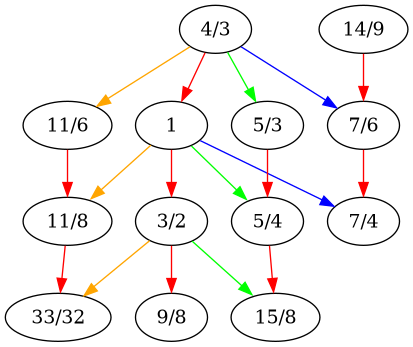

In [6]:
G = pgv.AGraph(directed=True)
G.add_nodes_from(frequencies)
for f in frequencies:
    for g in frequencies:
        if g > f:
            interval = g / f
            top_factors = factorint(interval.numerator)
            bottom_factors = factorint(interval.denominator)
            if set(bottom_factors) == {2} and len(top_factors) == 1:
                prime, multiplicity = next(iter(top_factors.items()))
                if multiplicity == 1:
                    G.add_edge(f, g, color=EDGE_COLORS[prime])
            elif set(top_factors) == {2} and len(bottom_factors) == 1:
                prime, multiplicity = next(iter(bottom_factors.items()))
                if multiplicity == 1:
                    G.add_edge(g, f, color=EDGE_COLORS[prime])
                    
G.layout(prog="dot")
G.draw('out.png')
Image("out.png")